=== PREPROCESSING ===

Missing Value:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Duplikat Value:
Total data duplikat:  723

Outlier age:


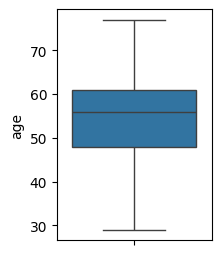


Outlier trestbps:


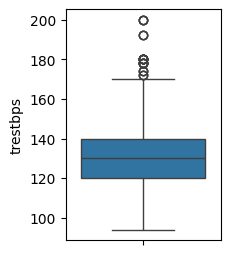


Outlier chol:


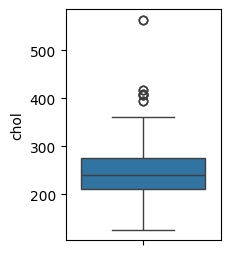


Outlier thalach:


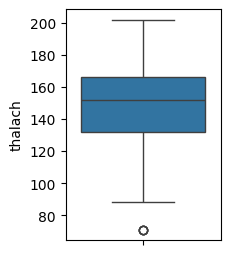


Outlier oldpeak:


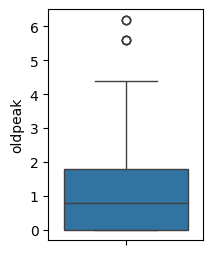


Handling Outlier trestbps (IQR):


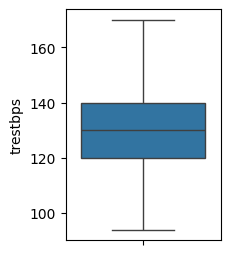


Handling Outlier chol (IQR):


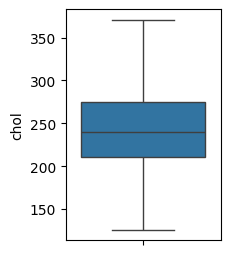


Handling Outlier thalach (IQR):


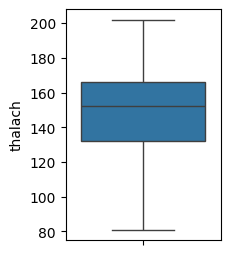


Handling Outlier oldpeak (IQR):


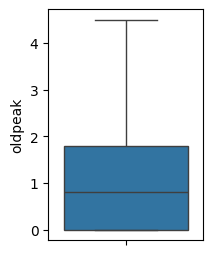


Standarisasi Kolom Numerik:
        age  trestbps      chol   thalach   oldpeak
0 -0.268437 -0.378869 -0.691104  0.824084 -0.054537
1 -0.158157  0.528894 -0.879693  0.255654  1.785457
2  1.716595  0.831481 -1.487368 -1.056105  1.347363
3  0.724079  1.013034 -0.879693  0.518006 -0.930725
4  0.834359  0.407859  1.027150 -1.886886  0.734031

Feature Engineering:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,high_risk
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

data = pd.read_csv('heart.csv')
numerik_column = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

print('=== PREPROCESSING ===\n')
print('Missing Value:')
print(data.isnull().sum())

print('\nDuplikat Value:')
print('Total data duplikat: ', data.duplicated().sum())

for i in numerik_column:
    print(f'\nOutlier {i}:')
    fig, ax = plt.subplots(figsize=(2,3))
    sns.boxplot(data[i])
    plt.show()

handling_outlier = ['trestbps', 'chol', 'thalach', 'oldpeak'] 
for i in handling_outlier:
    print(f'\nHandling Outlier {i} (IQR):')
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    outliers_terbawah = (data[i] < q1 - 1.5 * iqr).sum()
    outliers_teratas = (data[i] > q3 + 1.5 * iqr).sum()
    # data[i] = data[i][~((data[i] < (q1 - 1.5 * iqr)) | (data[i] > (q3 + 1.5 * iqr)))]
    data.loc[data[i] < q1 - 1.5 * iqr, i] = q1 - 1.5 * iqr
    data.loc[data[i] > q3 + 1.5 * iqr, i] = q3 + 1.5 * iqr
    fig, ax = plt.subplots(figsize=(2,3))
    sns.boxplot(data[i])    
    plt.show()

print('\nStandarisasi Kolom Numerik:')
scaler = StandardScaler()
x1 = data[numerik_column]
x1 = scaler.fit_transform(x1)
x1 = pd.DataFrame(x1, columns=numerik_column)
print(x1.head())

print('\nFeature Engineering:')
# High Risk
data['high_risk'] = (
    ((data['age'] > 55).astype(int)) &
    ((data['trestbps'] >= 140).astype(int) | (data['chol'] >= 240).astype(int)) &
    (data['exang'] == 1)).astype(int)
data.head()

### 🧩 <b>=== PREPROCESSING ===</b><br>

<b>1. 🔍 Missing Value</b><br>
✅ Tidak ada missing value, maka semua data dipertahankan.<br><br>

<b>2. 🧱 Duplicate Value</b><br>
📌 Terdapat banyak data duplikat. Jika dihapus, dapat mempengaruhi distribusi dataset.<br>
📌 Oleh karena itu, data duplikat <b>dipertahankan untuk menjaga keseimbangan dataset</b>.<br><br>

<b>3. 📊 Deteksi Outlier</b><br>
📌 Outlier terdeteksi pada kolom: <b>trestbps</b>, <b>chol</b>, <b>thalach</b>, dan <b>oldpeak</b>.<br><br>

<b>4. ✂️ Penanganan Outlier</b><br>
📌 Outlier diatasi menggunakan metode <b>Interquartile Range (IQR)</b>.<br>
📌 Nilai yang melebihi batas bawah atau atas diganti dengan nilai batasnya (capping).<br>
📌 Hasilnya, distribusi data menjadi lebih stabil tanpa menghapus data ekstrem.<br><br>

<b>5. ⚖️ Standarisasi Kolom Numerik</b><br>
📌 Kolom numerik distandarisasi menggunakan metode <b>Z-Score Scaling</b>.<br><br>

<b>6. 🧬 Feature Engineering (high_risk)</b><br>
📌 Identifikasi pasien dengan faktor risiko kardiovaskular tinggi:<br>
✅ <b>Usia > 55 tahun</b> → Risiko meningkat.<br>
✅ <b>Tekanan darah ≥140</b> atau <b>kolesterol ≥240</b> → Faktor metabolik.<br>
✅ <b>Exercise-induced angina (exang = 1)</b> → Nyeri dada saat aktivitas fisik.<br>



=== HASIL EVALUASI MODEL  ===
MAE : 0.6144599204352339
MSE : 0.6549270048402348
RMSE : 0.8092756049951307
R-Squared : 0.3602143203809458


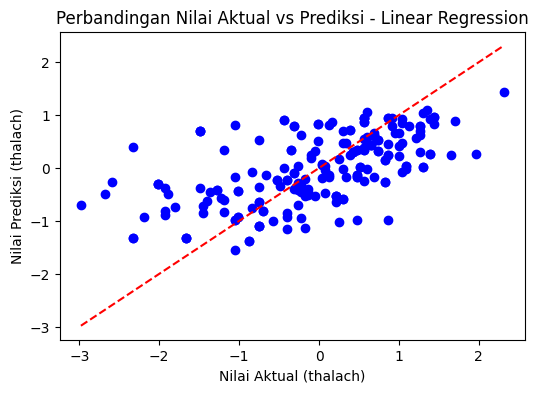

In [2]:
# LINEAR REGRESSION
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data_scaled = data.copy()
data_scaled[numerik_column] = x1[numerik_column]

x = data_scaled.drop(columns=['thalach', 'target'])
y = data_scaled['thalach']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

print("\n=== HASIL EVALUASI MODEL  ===")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Nilai Aktual (thalach)')
plt.ylabel('Nilai Prediksi (thalach)')
plt.title('Perbandingan Nilai Aktual vs Prediksi - Linear Regression')
plt.show()

## 📊 **Evaluasi Model Linear Regression**

### 💡 **Tujuan**
Model **Linear Regression** digunakan untuk **memprediksi variabel `thalach` (maximum heart rate)** berdasarkan beberapa variabel numerik lain seperti `age`, `chol`, `trestbps`, dan `oldpeak` setelah dilakukan proses **standarisasi data**.

### ⚙️ **Langkah Pembuatan Model**
1. **Data Scaling**
   - Semua kolom numerik telah distandarisasi menggunakan **Z-Score Scaling** agar setiap fitur memiliki skala yang seimbang.

2. **Pemilihan Variabel**
   - **X (features):** seluruh kolom kecuali `thalach` dan `target`.  
   - **Y (target):** kolom `thalach`.

3. **Split Data**
   - Dataset dibagi menjadi **80% data latih** dan **20% data uji** menggunakan `train_test_split`.

4. **Pelatihan Model**
   - Model dilatih menggunakan `LinearRegression()` dari library `sklearn`.

### 🔍 **Interpretasi Hasil**
- **MAE (0.614):** Rata-rata kesalahan prediksi sebesar **0.614 satuan** (dalam skala data yang sudah distandarisasi).  
- **RMSE (0.809):** Mengukur besar deviasi prediksi terhadap nilai aktual — semakin kecil nilainya, semakin baik.  
- **R² (0.36):** **36% variasi pada nilai `thalach` dapat dijelaskan oleh model linear regression**, sedangkan **64% sisanya** dipengaruhi oleh faktor lain yang belum dimasukkan dalam model.

Model ini memiliki **akurasi sedang**, menandakan adanya hubungan linear antara fitur dan `thalach`, namun belum terlalu kuat.

### 📉 **Visualisasi**
Garis merah putus-putus (diagonal) menunjukkan **prediksi sempurna (y = x)**.  
Semakin dekat titik-titik biru ke garis tersebut, semakin baik kinerja model.

📌 Dari grafik terlihat:
- Sebagian besar titik mengikuti arah garis diagonal.
- Namun masih terdapat penyebaran yang cukup lebar → menandakan masih ada kesalahan prediksi (error).

In [3]:
# SUPPORT VECTOR MACHINE (SVM)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

x = data_scaled.drop(columns=['high_risk'])
y = data_scaled['high_risk']
x = pd.get_dummies(X, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)

svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

# Evaluasi hasil
print("=== HASIL EVALUASI MODEL SVM ===")
print("\nConfusion Matrix:\n")
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred))

NameError: name 'X' is not defined

## 🤖 **Evaluasi Model Support Vector Machine (SVM)**
Model **SVM (Support Vector Machine)** digunakan untuk **memprediksi variabel `high_risk`**, yaitu indikator pasien dengan risiko tinggi terhadap penyakit jantung, berdasarkan fitur-fitur numerik dan kategori dari dataset `heart.csv`.

### ⚙️ **Langkah Pembuatan Model**
1. **Persiapan Data**
   - Kolom `high_risk` digunakan sebagai **target (Y)**.
   - Kolom lainnya dijadikan **fitur (X)**.
   - Fitur kategori diubah menjadi numerik menggunakan **One-Hot Encoding** (`pd.get_dummies`).
2. **Split Data**
   - Dataset dibagi menjadi **80% data latih** dan **20% data uji**, dengan parameter `stratify=y` agar distribusi kelas tetap seimbang.
3. **Pembangunan Model**
   - Menggunakan **SVM dengan kernel RBF (Radial Basis Function)**.
   - Parameter:
     - `C = 1` → mengontrol trade-off antara margin dan kesalahan.
     - `gamma = 'scale'` → otomatis menyesuaikan pengaruh setiap titik data.
   - Model dilatih dengan data training dan diuji pada data testing.

#### 🧮 **Confusion Matrix**
- **True Negative (TN):** 174 pasien berisiko rendah diprediksi benar rendah.  
- **False Positive (FP):** 1 pasien sebenarnya rendah tapi diprediksi tinggi.  
- **False Negative (FN):** 5 pasien sebenarnya tinggi tapi diprediksi rendah.  
- **True Positive (TP):** 25 pasien berisiko tinggi diprediksi benar tinggi.  

### 🔍 **Interpretasi Hasil Classification Report**
- **Accuracy (97%)** menunjukkan model sangat baik dalam mengklasifikasikan pasien risiko tinggi dan rendah.  
- **Precision 0.96–0.97:** prediksi positif cukup akurat, hanya sedikit kesalahan.  
- **Recall 0.83 pada kelas 1:** masih ada sebagian pasien risiko tinggi yang tidak terdeteksi (False Negative).  
- **F1-Score 0.89 untuk kelas 1:** keseimbangan antara precision dan recall cukup baik.

📌 Secara keseluruhan, model SVM berhasil memberikan performa klasifikasi yang **sangat baik**, dengan **tingkat kesalahan rendah dan generalisasi tinggi.**